## **import the Google Drive API into Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **import required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_rows',46608)
pd.set_option('display.max_columns',16)

### **Load the DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Dump.csv')

In [ ]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [ ]:
df.shape

(46608, 16)

In [ ]:
for i in df.columns:
  val = df[i].nunique()
  print(i,'=',val)
  print()

Unnamed: 0 = 46608

Agent_id = 120

status = 6

lost_reason = 30

budget = 1857

lease = 311

movein = 477

source = 683

source_city = 4336

source_country = 186

utm_source = 35

utm_medium = 64

des_city = 220

des_country = 15

room_type = 5

lead_id = 30574



## **Ploting**

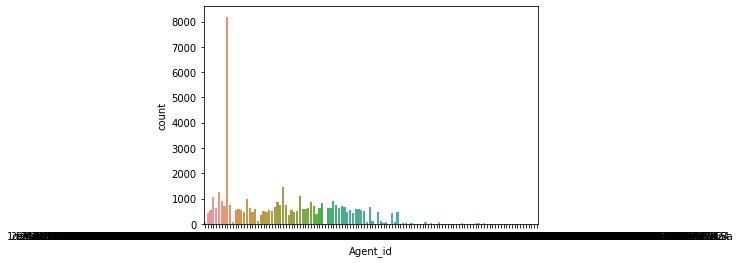

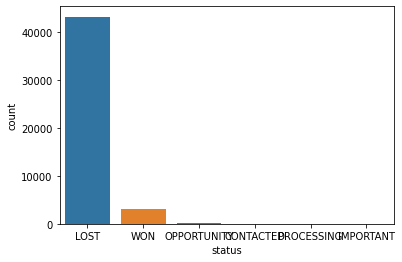

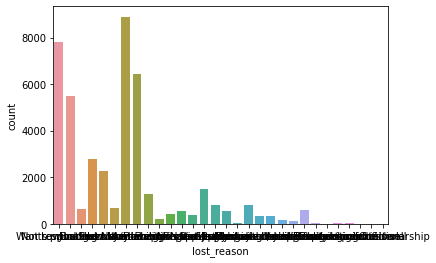

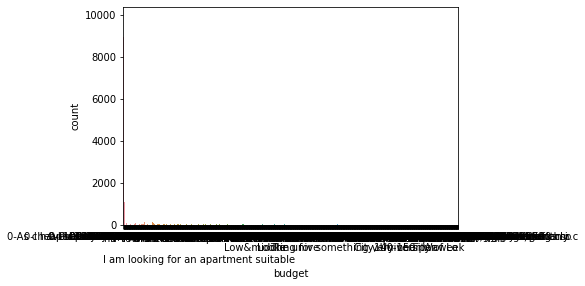

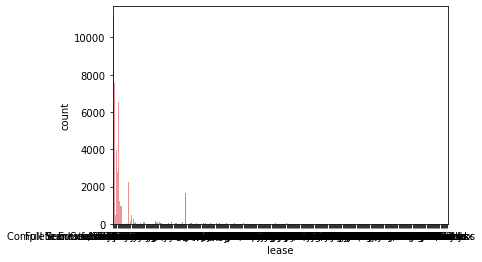

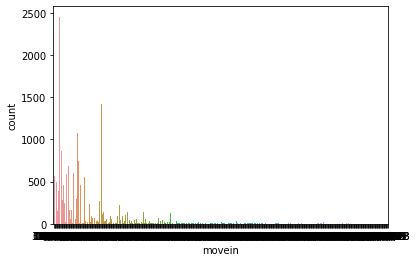

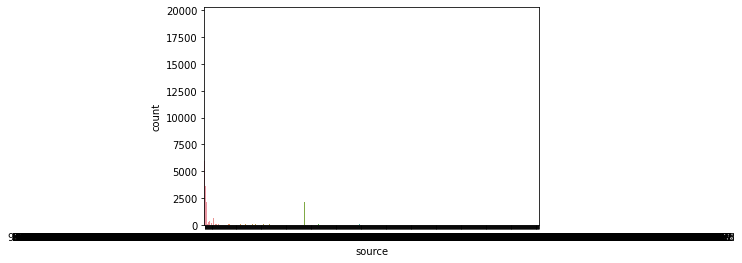

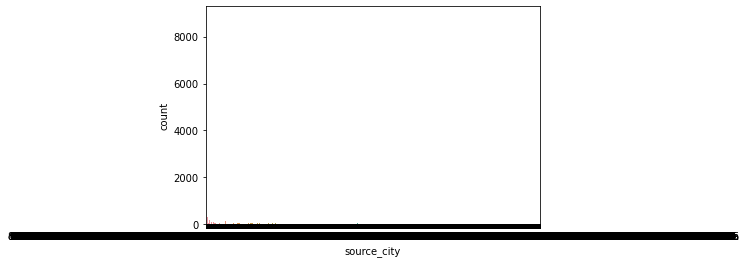

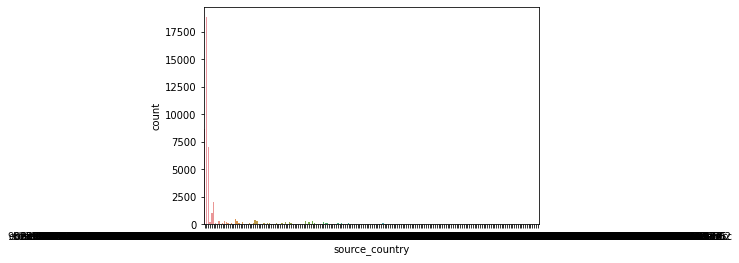

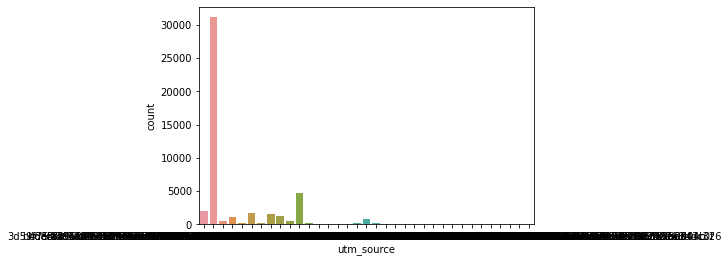

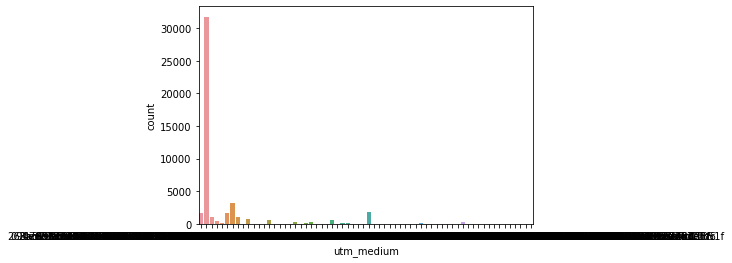

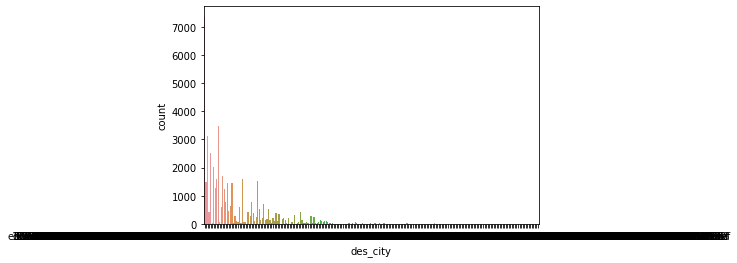

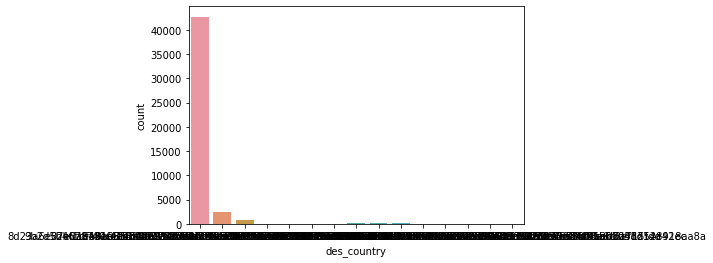

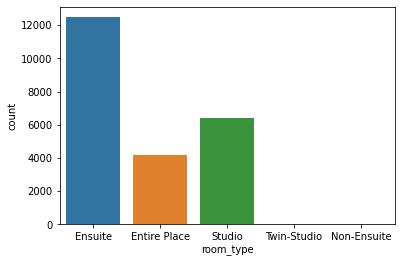

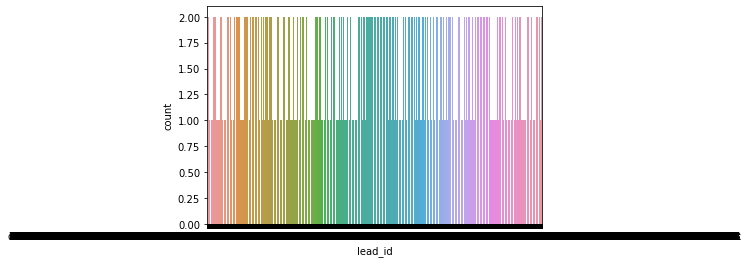

In [ ]:
for i in df.select_dtypes(exclude=np.number):
    sns.countplot(x=i,data=df)
    plt.show()

In [ ]:
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0         int64
Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
lead_id           object
dtype: object

## **Data Cleaning**

In [ ]:
df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',None,inplace=True)

In [ ]:
df[df['source']=='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id


In [ ]:
df[df['lead_id']=='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0']

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id


In [ ]:
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source             5977
source_city        8851
source_country     8641
utm_source           61
utm_medium         3187
des_city           2537
des_country        2537
room_type         23547
lead_id               0
dtype: int64

In [ ]:
# Find columns with null values
null_cols = ['lost_reason', 'budget', 'lease', 'movein', 'source', 'source_city', 
             'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country', 
             'room_type']



In [ ]:
for i in null_cols:
  # print(i)
  df[i].fillna(df[i].mode()[0],inplace= True)

In [ ]:
df.isna().sum()

Unnamed: 0        0
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
lead_id           0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,10/09/22,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [ ]:
df['status'].unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [ ]:
df['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

## **Drop unwanted rows**

In [ ]:
drop_row = ['OPPORTUNITY','CONTACTED','PROCESSING','IMPORTANT']

In [ ]:
df.drop(df.loc[df['status']=='OPPORTUNITY'].index, inplace=True)
df.drop(df.loc[df['status']=='CONTACTED'].index, inplace=True)
df.drop(df.loc[df['status']=='PROCESSING'].index, inplace=True)
df.drop(df.loc[df['status']=='IMPORTANT'].index, inplace=True)


In [ ]:
df.shape

(46317, 16)

In [ ]:
df1 = df

In [ ]:
# df1.drop(df1.columns[[0]], axis=1, inplace=True)

In [ ]:
df1.head(1)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...


In [ ]:
df1.shape

(46317, 16)

In [ ]:
# df1.set_index("status", inplace=True)

In [ ]:
df1.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,10/09/22,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


## **Feature Selection**

In [ ]:
X = df1.loc[:,['Agent_id', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id']]
y = df1.loc[:,['status']]

In [ ]:
X.columns

Index(['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [ ]:
y.columns

Index(['status'], dtype='object')

In [ ]:
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = y.apply(le.fit_transform)

In [ ]:
X.head()

,Agent_id,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,12,21,1834,266,165,343,3995,165,5,10,205,8,0,24421
1,20,16,1834,266,165,343,3995,165,5,10,74,8,0,22037
2,87,21,1752,266,463,343,2619,165,25,3,18,8,0,17924
3,110,16,10,2,165,507,2817,165,25,3,26,8,0,3582
4,12,8,1834,266,165,343,3995,165,5,10,205,8,0,30016


In [ ]:
X.dtypes

Agent_id          int64
lost_reason       int64
budget            int64
lease             int64
movein            int64
source            int64
source_city       int64
source_country    int64
utm_source        int64
utm_medium        int64
des_city          int64
des_country       int64
room_type         int64
lead_id           int64
dtype: object

In [ ]:
y.sample(2)

,status
1566,0
44572,0


In [ ]:
y.value_counts()

status
0         43244
1          3073
dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X = df1.loc[:,['Agent_id', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id']]
y = df1.loc[:,['status']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

# One-hot encode categorical features
onehot_encoder = OneHotEncoder()
X_categorical = onehot_encoder.fit_transform(X)

# Select the top 8 features based on chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_categorical, y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Modeling**

# **Random Forest Classifier**

In [ ]:
# Train a random forest classifier and tune hyperparameters
rf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None]}
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_scaled, y_train.values.ravel())

rf_acc = rf_cv.score(X_test_scaled, y_test)
print("Random Forest accuracy:", rf_acc)
print("Best parameters:", rf_cv.best_params_)

Random Forest accuracy: 0.9644861830742659
Best parameters: {'max_depth': 5, 'n_estimators': 100}


# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 27)
smote_X_train,smote_y_train = smote.fit_resample(X_train_scaled,y_train)

In [ ]:
smote_X_train.shape

(69124, 5)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(smote_X_train, smote_y_train)
y_pred = rf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)


<ipython-input-81-89c9c0c96f87>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(smote_X_train, smote_y_train)


0.9644861830742659

In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,8353,329
1,0,582


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, pos_label='WON')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, pos_label='WON')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, pos_label='WON')
print("F1-score:", f1)

Accuracy: 0.9644861830742659
Precision: 0.6388583973655324
Recall: 1.0
F1-score: 0.7796383121232419
